# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sinasc = pd.read_csv('sinasc_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [47]:
#Dataframe com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE:
df = sinasc[['APGAR1','APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']]
df.head()

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE
0,9.0,10.0,Masculino,37 a 41 semanas,5.0
1,8.0,9.0,Feminino,37 a 41 semanas,2.0
2,8.0,10.0,Feminino,37 a 41 semanas,9.0
3,9.0,10.0,Feminino,37 a 41 semanas,5.0
4,8.0,10.0,Feminino,37 a 41 semanas,2.0


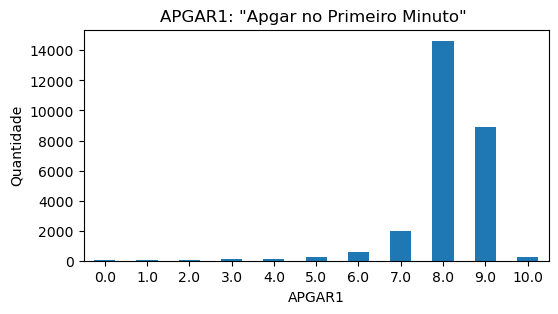

In [48]:
# Grafico de barras da variavel APGAR1:
plt.figure(figsize = (6,3))
df['APGAR1'].value_counts().sort_index().plot(kind='bar')
plt.title('APGAR1: "Apgar no Primeiro Minuto" ')
plt.xlabel('APGAR1')
plt.ylabel('Quantidade')
plt.xticks(rotation = 0)
plt.show()

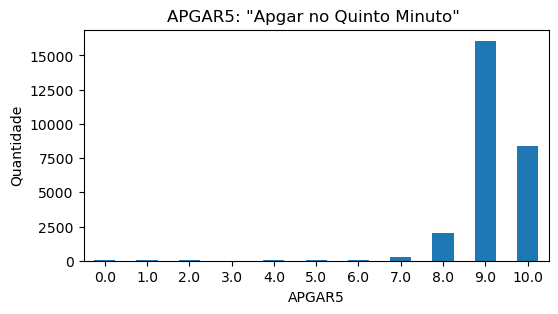

In [49]:
# Grafico de barras da variavel APGAR5:
plt.figure(figsize= (6,3))
df['APGAR5'].value_counts().sort_index().plot(kind='bar')
plt.title('APGAR5: "Apgar no Quinto Minuto" ')
plt.xlabel('APGAR5')
plt.ylabel('Quantidade')
plt.xticks(rotation = 0)
plt.show()

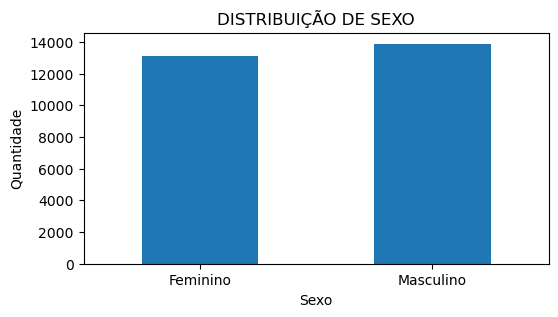

In [50]:
# Grafico de barras da variavel SEXO:
plt.figure(figsize = (6,3))
df['SEXO'].value_counts().sort_index().plot(kind='bar')
plt.title('DISTRIBUIÇÃO DE SEXO')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.xticks(rotation = 0)
plt.show()

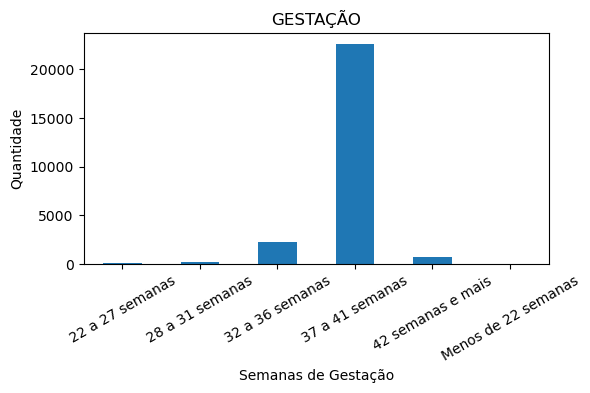

In [51]:
# Grafico de barras da variavel GESTACAO:
plt.figure(figsize = (6,3))
df['GESTACAO'].value_counts().sort_index().plot(kind='bar')
plt.title('GESTAÇÃO')
plt.xlabel('Semanas de Gestação')
plt.ylabel('Quantidade')
plt.xticks(rotation = 30)
plt.show()

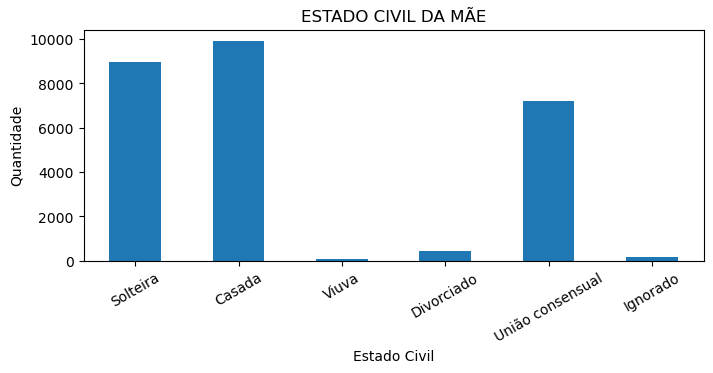

In [52]:
# Grafico de barras da variavel ESTADO CIVIL com as legendas:
#1= 'Solteira'
#2= 'Casada'
#3= 'Viuva'
#4= 'Separado judicialmente/Divorciado'
#5= 'União consensual (versões anteriores)'
#9= 'Ignorado'

plt.figure(figsize = (8,3))
ax = df['ESTCIVMAE'].value_counts().sort_index().plot(kind='bar')
plt.title('ESTADO CIVIL DA MÃE')
plt.xlabel('Estado Civil')
plt.ylabel('Quantidade')
ax.set_xticklabels(['Solteira','Casada','Viuva','Divorciado','União consensual','Ignorado'])
plt.xticks(rotation = 30)

plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [53]:
#Calculei a media do APGAR5 por consultas atraves do metodo 'groupby'
apgar5_consultas = sinasc.groupby('CONSULTAS')['APGAR5'].mean()
apgar5_consultas.value_counts

<bound method IndexOpsMixin.value_counts of CONSULTAS
1    8.981481
2    9.057395
3    9.154440
4    9.207188
9    8.860000
Name: APGAR5, dtype: float64>

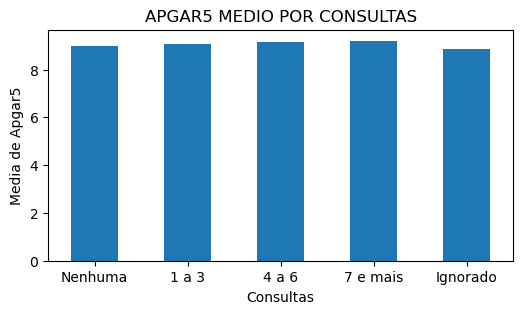

In [54]:
#Coloquei legenda na classificacao dos numeros das consultas para melhor entendimento no grafico:

plt.figure(figsize = (6,3))
ax = apgar5_consultas.sort_index().plot(kind='bar')
plt.title('APGAR5 MEDIO POR CONSULTAS')
plt.xlabel('Consultas')
plt.ylabel('Media de Apgar5')
ax.set_xticklabels(['Nenhuma', '1 a 3', '4 a 6', '7 e mais', 'Ignorado'])
plt.xticks(rotation =0)

plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

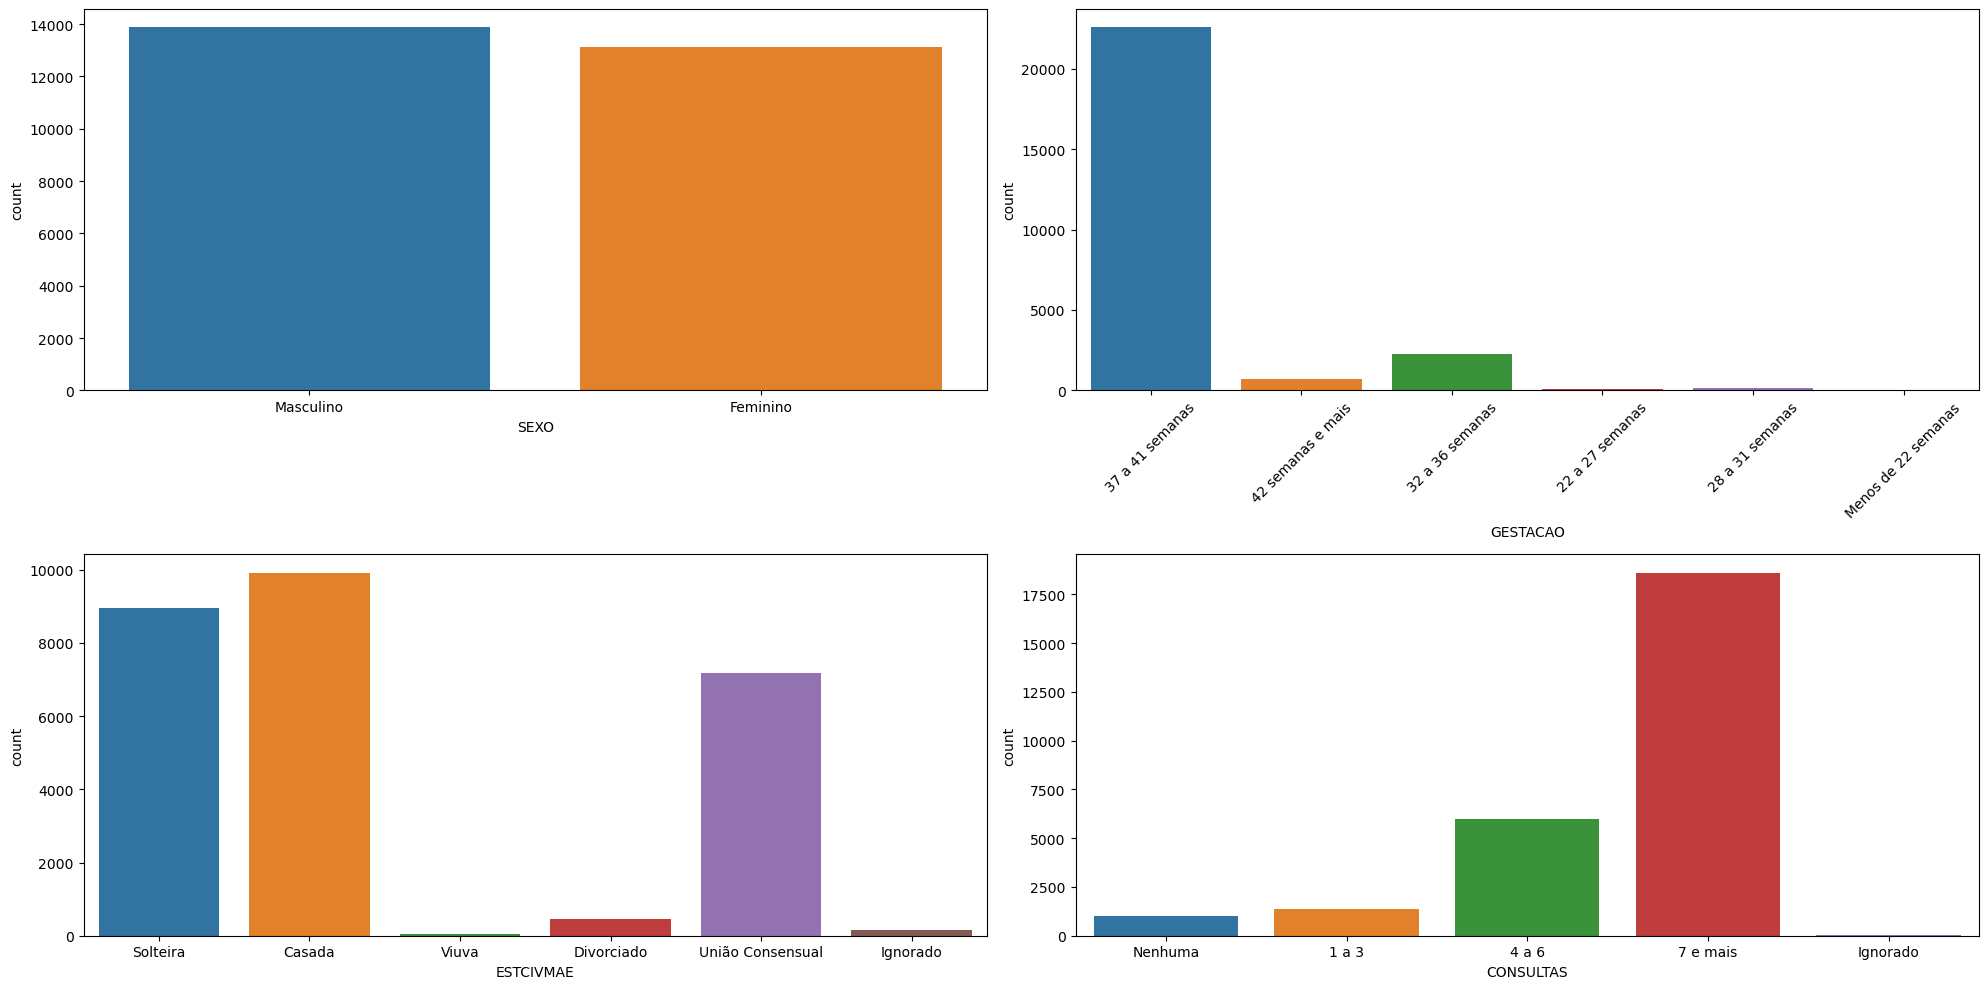

In [55]:
#Utilizei o countplot do Seaborn para montar um painel com 4 graficos:

fig, axes = plt.subplots(2, 2, figsize=(20,10))
ax1 = sns.countplot(ax = axes[0, 0], x='SEXO', data = sinasc)
ax2 = sns.countplot(ax = axes[0, 1], x='GESTACAO', data = sinasc)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45) #rotacionei os labels para melhor visualização dos nomes
ax3 = sns.countplot(ax = axes[1, 0], x='ESTCIVMAE', data = sinasc)
ax3.set_xticklabels(['Solteira','Casada','Viuva','Divorciado','União Consensual','Ignorado']) #legendei os numeros do eixo x para melhor entendimento de dados
ax4 = sns.countplot(ax = axes[1, 1], x='CONSULTAS', data = sinasc)
ax4.set_xticklabels(['Nenhuma', '1 a 3', '4 a 6', '7 e mais', 'Ignorado']) #legendei os numeros do eixo x para melhor entendimento de dados

plt.tight_layout()
plt.show()